# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x


In [2]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive/AIML/')

In [5]:
%pwd

'/content/drive/My Drive/AIML'

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
#### Add your code here ####
project_path = "/content/drive/My Drive/AIML/Aligned Face Dataset.zip"

In [0]:
import zipfile
archive = zipfile.ZipFile(project_path, 'r')
archive.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [0]:
#### Add your code here ####
img = load_image(metadata[0].image_path())

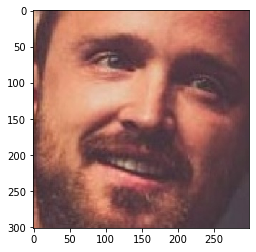

In [11]:
import matplotlib.pyplot as plt
plt.subplot()
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()

In [0]:
model.load_weights('vgg_face_weights.h5', by_name=True)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [16]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [17]:
embedding_vector

array([ 2.0796758e-04, -1.2138036e-04,  5.1260951e-05, ...,
        8.8756478e-06, -2.0715439e-04, -2.1300185e-04], dtype=float32)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [19]:
len(metadata)

10770

In [37]:
metadata[2]

PINS/pins_Aaron Paul/Aaron Paul101_248.jpg

In [38]:
metadata[180]

PINS/pins_Amanda Crew/Amanda Crew100.jpg

In [22]:
#### Add your code here ####
embeddings = np.zeros((metadata.shape[0], 2622))
embeddings.shape


(10770, 2622)

In [23]:
for i in range(len(metadata)):
  img_path = metadata[i].image_path()
  print(i,metadata[i])
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))
  #print(img.shape)
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  #print(embedding_vector.shape)
  embeddings[i] = embedding_vector



0 PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
1 PINS/pins_Aaron Paul/Aaron Paul101_247.jpg
2 PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
3 PINS/pins_Aaron Paul/Aaron Paul101_249.jpg
4 PINS/pins_Aaron Paul/Aaron Paul103_217.jpg
5 PINS/pins_Aaron Paul/Aaron Paul113_228.jpg
6 PINS/pins_Aaron Paul/Aaron Paul114_271.jpg
7 PINS/pins_Aaron Paul/Aaron Paul116_240.jpg
8 PINS/pins_Aaron Paul/Aaron Paul117_213.jpg
9 PINS/pins_Aaron Paul/Aaron Paul119_219.jpg
10 PINS/pins_Aaron Paul/Aaron Paul120_290.jpg
11 PINS/pins_Aaron Paul/Aaron Paul124_221.jpg
12 PINS/pins_Aaron Paul/Aaron Paul126_291.jpg
13 PINS/pins_Aaron Paul/Aaron Paul129_259.jpg
14 PINS/pins_Aaron Paul/Aaron Paul129_260.jpg
15 PINS/pins_Aaron Paul/Aaron Paul130_215.jpg
16 PINS/pins_Aaron Paul/Aaron Paul132_236.jpg
17 PINS/pins_Aaron Paul/Aaron Paul136_225.jpg
18 PINS/pins_Aaron Paul/Aaron Paul137_250.jpg
19 PINS/pins_Aaron Paul/Aaron Paul138_233.jpg
20 PINS/pins_Aaron Paul/Aaron Paul140_243.jpg
21 PINS/pins_Aaron Paul/Aaron Paul145_256.jpg


In [36]:
embeddings[2]

array([ 2.62177695e-04, -2.39656321e-04, -4.06848121e-05, ...,
       -8.07825199e-05, -3.59713100e-04, -3.82348400e-04])

In [35]:
embeddings[180]

array([ 1.52581852e-04, -1.81331314e-04, -5.17238868e-06, ...,
       -4.13598973e-05, -2.91854580e-04, -2.35531712e-04])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [34]:
distance(embeddings[2], embeddings[180])

3.389505914396342e-05

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

Distance:  0.0


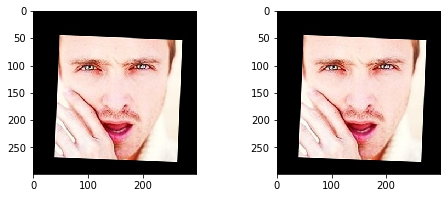

In [30]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    Distance = distance(embeddings[idx1], embeddings[idx2])
    print('Distance: ',Distance)
    
    #plt.suptitle(f'Distance = {distance(embeddings[idx1],embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    


show_pair(2, 2)

Distance:  3.389505914396342e-05


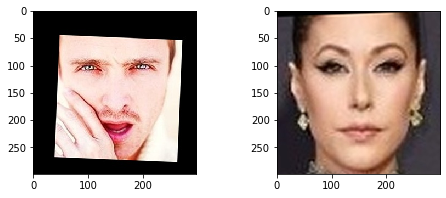

In [33]:
show_pair(2, 180)

Distance:  2.1494994316775045e-05


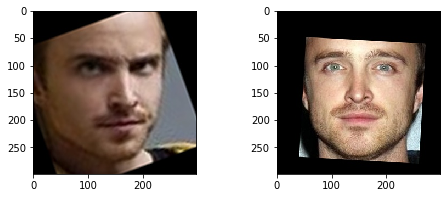

In [39]:
show_pair(30, 31)

Distance:  2.852103274149747e-05


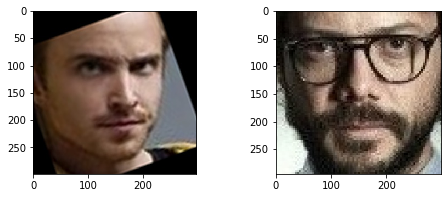

In [40]:
show_pair(30, 100)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

In [0]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [44]:
str(metadata[0])[5:].split('/')[0]

'pins_Aaron Paul'

In [45]:
print(len(metadata))

10770


In [0]:
#PINS/pins_david mazouz/david mazouz17.jpg
l = len(metadata)
name = []
for pth in range(0,l):
  name.append(str(metadata[pth])[5:].split('/')[0])

In [47]:
name

['pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',


In [0]:
import numpy as np

In [0]:
y = np.asarray(name) 

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####

In [51]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [0]:
y_new = encoder.transform(y)

In [53]:
y_new

array([ 0,  0,  0, ..., 99, 99, 99])

In [0]:
y_train = y_new[train_idx]
y_test = y_new[test_idx]

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####

In [0]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

#### Add your code here ####

In [58]:
scaled_X_train.shape

(9573, 2622)

In [0]:
pca = PCA(n_components = 1100)
pca_scaled_X_train = pca.fit_transform(scaled_X_train)

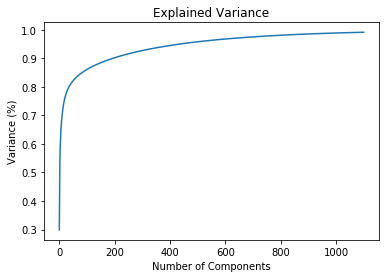

In [60]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [61]:
pca_scaled_X_train.shape

(9573, 1100)

In [62]:
scaled_X_test.shape

(1197, 2622)

In [0]:
pca_scaled_X_test = pca.fit_transform(scaled_X_test)

In [64]:
pca_scaled_X_test.shape

(1197, 1100)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC

#### Add your code here ####

In [0]:
model_svm =SVC()

In [67]:
model_svm.fit(pca_scaled_X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = model_svm.predict(pca_scaled_X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [70]:
acc_score = accuracy_score(y_test,y_pred)
print('score:',acc_score)

score: 0.06599832915622389


In [0]:
model_svm1 =SVC()

In [72]:
model_svm1.fit(scaled_X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred1 = model_svm1.predict(scaled_X_test)

In [74]:
print(accuracy_score(y_test,y_pred1))

0.1620718462823726


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

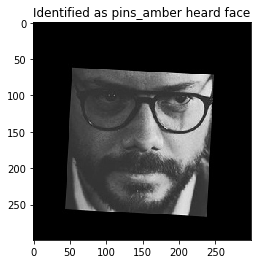

In [76]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = model_svm1.predict(scaler.fit_transform([embeddings[test_idx][example_idx]]))#### Add your code here ####
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');